<a href="https://colab.research.google.com/github/MarceloZanguettin/IA_Busca_Rainha/blob/main/IA_BuscaRainha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Busca - Problemas das n-rainhas

F = Números de rainhas que não se atacam

Mínimo: 0 (meta)

Máximo: Combinação (N,2) = N! / ((N-2)!*2!)-N*(N-1)/2

Para N=8

MAX = 8! / ((8-2)!*2!)-8*(8-1)/2

In [ ]:
# importar blibliotecas
import logging as log
import sys
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14,7)
import math
import random
import copy
import itertools as it
TAMANHODEFAULTTABULEIRO = 8
DIRECAO =['norte', 'nordeste', 'leste', 'sudeste', 'sul', 'sudoeste', 'oeste', 'noroeste']

In [ ]:
# Função para gerar um tabuleiro

def geraTabuleiro(tamanho):
    if tamanho < 2 : return [-1]
    tab = []
    for i in range(tamanho):
        l=[]
        for j in range(tamanho):
            l.append(0)
        tab.append(l)
    for i in range(tamanho) : tab[i][0] = 1
    return tab 

In [ ]:
# Função para imprimir o tabuleiro

def printTabuleiro(tab):
    for i in tab: print(i)

In [ ]:
printTabuleiro(geraTabuleiro(4))

[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]


In [ ]:
# Função para localizar as rainhas

def locateQueens(estado):
    q = []
    for i in range(len(estado)):
        for j in range(len(estado)):
            if estado[i][j] == 1 : q.append((i,j))
    return q

In [ ]:
print(locateQueens(geraTabuleiro(4)))

[(0, 0), (1, 0), (2, 0), (3, 0)]


In [ ]:
# Função para calcular a quantidade de ataques no tabuleiro
def calAtaques (estado):
    at=0
    # ataques em linha
    atLinhas = 0
    for i in estado:
        if sum(i) > 1:
            atLinhas += sum(i)-1
    at += atLinhas

    # ataques em coluna
    atColunas = 0
    for c in range(len(estado)):
        nl=0
        for l in range(len(estado)):
            nl += estado[l][c]
        if nl > 1:
            atColunas += nl-1
    at += atColunas

    # Ataques na diagonal
    pr = locateQueens(estado)
    atDiagonal = 0
    for p, coords in enumerate(pr):
        i,j = coords
        # Diagonal Esquerda
        k,w = i+1, j-1
        while(w>=0 and k<len(estado)):
            if estado[k][w] == 1:
                atDiagonal+=1
                break
            w -= 1
            k += 1
        # Diagonal Direita
        l, c = i+1, j+1
        while (l < len(estado) and c<len(estado)):
            if estado[l][c] == 1:
                atDiagonal+=1
                break
            l += 1
            c += 1
    at += atDiagonal
    return at

In [ ]:
print(calAtaques(geraTabuleiro(4)))

3


In [ ]:
# Função para movimentar uma rainha
def moveRainhaAleatoria(estado, passo):
    tam = len(estado)
    while True:
        i, j = random.choice(locateQueens(estado))
        k = (j + passo)%tam
        if estado[i][k] == 0:
            estado[i][k], estado[i][j] = estado[i][j], estado[i][k]
            break
    return estado

In [ ]:
printTabuleiro(moveRainhaAleatoria(geraTabuleiro(4), 2))

[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[0, 0, 1, 0]


In [ ]:
# Busca Cega
def buscaCega(estado, passo, MAX):
    n = len(estado[0])
    ataques=[]
    i = 0
    # Quantidade maxima de ataques possiveis
    maxAtaques = math.factorial(n)/(2*math.factorial(n-2))
    while i < MAX:
        atq = calAtaques(estado)
        ataques.append(maxAtaques - atq)
        if atq == 0 : break
        estado = moveRainhaAleatoria(copy.deepcopy(estado), passo)
        i += 1
    # Grafico de desempenho
    x = range(len(ataques))
    plt.plot(x, ataques)
    plt.xlabel("Rodada")
    plt.ylabel("Ataques evitados (função objetivo)")
    plt.show()

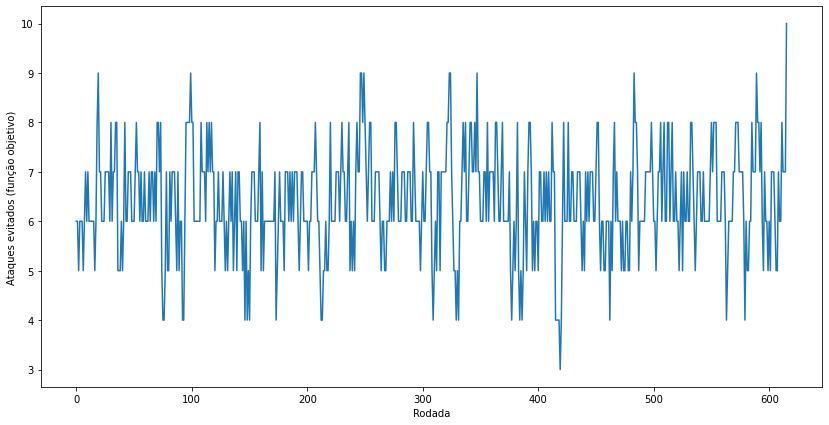

In [ ]:
buscaCega(geraTabuleiro(5), 2, 5000)

In [ ]:
from matplotlib import subprocess
# Busca Hill Climbing
def buscaHC(estado, passo, MAX):
    c = 0
    n = len(estado[0])
    maxAtaques = math.factorial(n)/(2*math.factorial(n-2))
    ataques = []
    change = True
    while c < MAX:
        change = False
        atq = calAtaques(estado)
        ataques.append(maxAtaques - atq)
        if atq == 0:
            return "Solução", estado, atq, ataques
        suc = moveRainhaAleatoria(copy.deepcopy(estado), passo)
        if calAtaques(suc) <= atq:
            estado = suc
            change = True
        if not change: c+=1
    return "Falha", estado, atq, ataques

Resultado: Solução
[0, 1, 0, 0, 0]
[0, 0, 0, 0, 1]
[0, 0, 1, 0, 0]
[1, 0, 0, 0, 0]
[0, 0, 0, 1, 0]


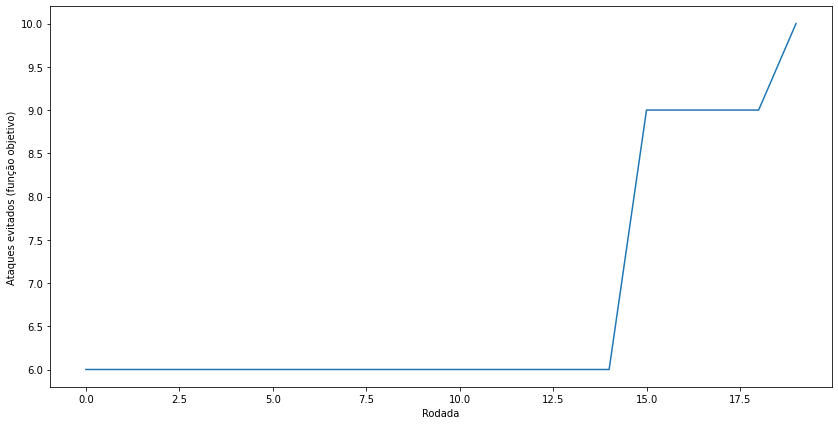

In [ ]:
# Testando busca Hill Climbing
m, e, a, y = buscaHC(geraTabuleiro(5), 2, 50000)
print("Resultado:",m)
printTabuleiro(e)
x = range(len(y))
# Grafico de desempenho
plt.plot(x, y)
plt.xlabel("Rodada")
plt.ylabel("Ataques evitados (função objetivo)")
plt.show()